In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame
songs_csv = "../../Resources/songs_with_popularity_trimmed.csv"
songs_df = pd.read_csv(songs_csv, index_col=0)
# songs_df.columns
songs_df = songs_df.dropna()
songs_df = songs_df.sort_values(by=['popularity'])
songs_df[['danceability', 'energy', 'key', 'loudness', 'mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature','popularity']].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
count,74078.000000,74078.000000,74078.000000,74078.000000,74078.000000,74078.000000,74078.000000,74078.000000,74078.000000,74078.000000,74078.000000,74078.000000,74078.000000
mean,0.492801,0.537861,5.240652,-11.418241,0.679082,0.085718,0.406758,0.287373,0.211149,0.435249,118.303222,3.838805,6.680242
std,0.187416,0.292112,3.544987,6.585748,0.466833,0.124420,0.379746,0.376536,0.191585,0.268713,30.791317,0.558547,10.626528
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.356000,0.291000,2.000000,-14.478000,0.000000,0.034800,0.023500,0.000012,0.097400,0.202000,95.047000,4.000000,0.000000
50%,0.500000,0.559000,5.000000,-9.647000,1.000000,0.044400,0.292000,0.010800,0.128000,0.415000,117.599000,4.000000,2.000000
75%,0.631000,0.798000,8.000000,-6.684000,1.000000,0.072300,0.815000,0.724000,0.264000,0.651000,137.208000,4.000000,9.000000
max,0.987000,1.000000,11.000000,4.232000,1.000000,0.966000,0.996000,0.999000,1.000000,1.000000,246.130000,5.000000,86.000000


In [4]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = songs_df[['danceability', 'energy', 'key', 'loudness', 'mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature','duration_ms']]
# X = songs_df[['danceability', 'energy', 'key', 'loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature']]
# X = songs_df[['danceability', 'energy', 'loudness','valence','tempo']]
y = songs_df["popularity"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(74078, 13) (74078, 1)


In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.04414286731827288


## Residuals ##

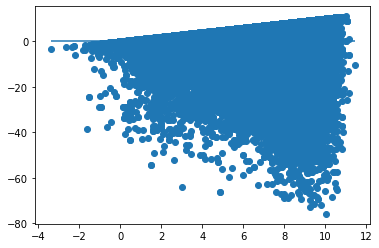

In [6]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()